# Project  #3

In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

import matplotlib.pyplot as plt


* Loading Data

In [2]:
# Loading the CSV file
file_path = "data.csv"
data = pd.read_csv(file_path)

* Preparing the Data for Algorithm
    - Data Splitting:
        - First, split the data into features and target
        - Second, Split data into training data and testing data. 
            - 80% Training and 20% Testing

In [23]:
# Splitting the data into features and target
X = data[['X1', 'X2', 'X3', 'X4', 'X5']]
y = data['Y']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


* Data Transformation
    - Standardization: 
        - Will transform data to make sure they are all scaled on similar data.
        - This will improve training performance of the model since the data is compatible with the algorithm.

In [24]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

* Build Neural Network Model
    - 3 Layer Sequential Model.
        - Two hidden layers, each with 500 neurons and ReLU activation functions.
        - Final Output layer has 1 neuron. This works well for binary classification tasks like the one needed for this project. The model is only going to predict whether is falls into one class or the other.
        - Sigmoid activation function was used. It is used for binary classification.Which squashes the output into the range (0,1). This allows the output to be interpreted as the probability that the given input belongs to one of the two classes 

In [25]:
# Building the neural network model
def build_model(optimizer='adam', dropout_rate=0.2):
    model = Sequential()

    # First hidden layer with 500 neurons
    model.add(Dense(500, input_dim=5, activation='relu'))
    model.add(Dropout(dropout_rate)) # Dropout layer

    # Second hidden layer with 500 neurons
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(dropout_rate)) # Dropout layer

    # Output layer with 1 neuron (binary classification)
    model.add(Dense(1, activation='sigmoid'))

    #model.summary()
    
    # Compiling the model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

* Model Training
    - Model is trained on Standardized data.
    - Include Validation Step during training to monitor how well the model is performing on unseen data throughout the training process. This is helpful later for preventing overfitting and tuning the model.

Epoch 1/50
51/51 [==============================] - 1s 5ms/step - loss: 0.1150 - accuracy: 0.9719 - val_loss: 0.0487 - val_accuracy: 0.9877
Epoch 2/50
51/51 [==============================] - 0s 4ms/step - loss: 0.0473 - accuracy: 0.9880 - val_loss: 0.0402 - val_accuracy: 0.9877
Epoch 3/50
51/51 [==============================] - 0s 4ms/step - loss: 0.0417 - accuracy: 0.9876 - val_loss: 0.0353 - val_accuracy: 0.9877
Epoch 4/50
51/51 [==============================] - 0s 4ms/step - loss: 0.0389 - accuracy: 0.9882 - val_loss: 0.0318 - val_accuracy: 0.9877
Epoch 5/50
51/51 [==============================] - 0s 4ms/step - loss: 0.0368 - accuracy: 0.9877 - val_loss: 0.0347 - val_accuracy: 0.9877
Epoch 6/50
51/51 [==============================] - 0s 4ms/step - loss: 0.0349 - accuracy: 0.9880 - val_loss: 0.0291 - val_accuracy: 0.9877
Epoch 7/50
51/51 [==============================] - 0s 3ms/step - loss: 0.0324 - accuracy: 0.9882 - val_loss: 0.0279 - val_accuracy: 0.9877
Epoch 8/50
51/51 [==

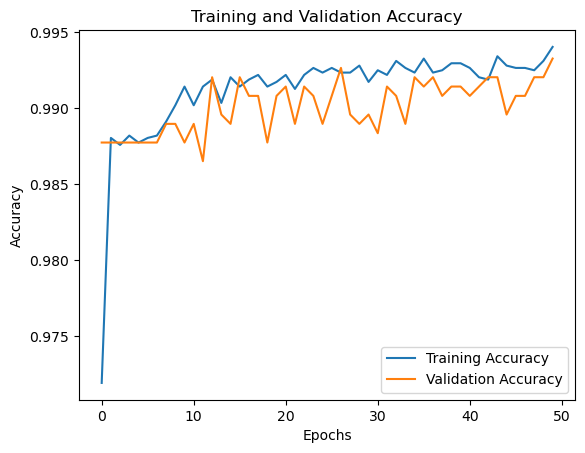

In [26]:
# Build model
basic_model = build_model()

# Training the model
history = basic_model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=128, verbose=1)

# Plotting the training accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')

# Plotting the validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Adding a title to the plot
plt.title('Training and Validation Accuracy')

# Adding labels for the X and Y axes
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Adding a legend to the plot to identify the lines
plt.legend()

# Displaying the plot
plt.show()

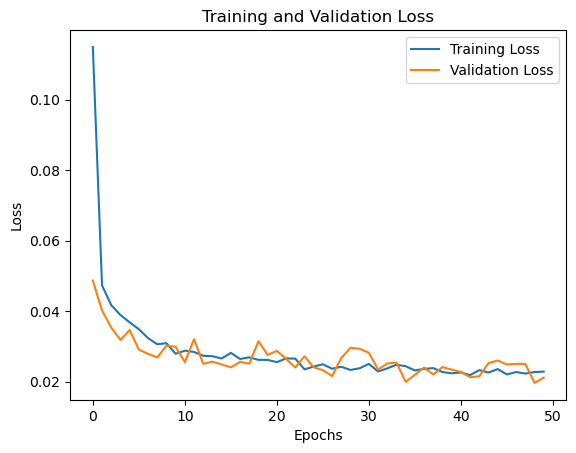

In [27]:
''' 
Plotting the training and validation loss.
This will help visualize if there is any Overfitting
'''
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

* Model Training Analysis:
    - High Accuracy: Both the training accuracy and validation accuracy are high, reaching above 98%. This suggests that the model is performing well on both the training data and unseen validation data.

    - Stable Loss: The loss for both training and validation seems to decrease over iterations. This indicates that the model is learning and improving its predictions. The validation loss also appears stable, without significant fluctuations, which is a good sign.

    - No Signs of Overfitting: Overfitting can be noted on the Training and Validation Loss graph as a continuous decrease in training loss while the validation loss starts to increase. Since both training and validation loss are decreasing or stable, there's no clear sign of overfitting.


    - Final Validation Accuracy: The final validation accuracy of 99.26%. This is important because it indicates how well the model is expected to perform on unseen data.


In [28]:
# Evaluating the model on the test set
test_loss, test_accuracy = basic_model.evaluate(X_test_scaled, y_test, verbose=0)

# Printing the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss * 100:.2f}%")



Test Accuracy: 99.32%
Test Loss: 2.11%


--------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------


* Optimization: 
    - Will try to optimize the model by doing Hyperparameter Tunning

* Hyperparameter Tunning

In [29]:
# Find the optimal parameters using GridSeachCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'batch_size': [64, 128],
    'epochs': [30, 50],
    'optimizer': ['RMSprop', 'Adam'],
    'dropout_rate': [0.2, 0.5]
}


# Wrap model with KerasClassifier to use sci-learn methods like GridSearchCV
model = KerasClassifier(build_fn=build_model, verbose=0)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2, return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

# Print parameters found
best_params = grid_search.best_params_


/var/folders/0r/cspyd7gn35n_w69jrx0rxmn00000gn/T/ipykernel_97809/1428677028.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=build_model, verbose=0)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END batch_size=64, dropout_rate=0.2, epochs=30, optimizer=RMSprop; total time=   6.4s
[CV] END batch_size=64, dropout_rate=0.2, epochs=30, optimizer=RMSprop; total time=   6.4s
[CV] END batch_size=64, dropout_rate=0.2, epochs=30, optimizer=RMSprop; total time=   6.6s
[CV] END batch_size=64, dropout_rate=0.2, epochs=30, optimizer=RMSprop; total time=   7.1s
[CV] END batch_size=64, dropout_rate=0.2, epochs=30, optimizer=RMSprop; total time=   7.5s
[CV] END batch_size=64, dropout_rate=0.2, epochs=30, optimizer=Adam; total time=   6.7s
[CV] END batch_size=64, dropout_rate=0.2, epochs=30, optimizer=Adam; total time=   6.7s
[CV] END batch_size=64, dropout_rate=0.2, epochs=30, optimizer=Adam; total time=   7.0s
[CV] END batch_size=64, dropout_rate=0.2, epochs=30, optimizer=Adam; total time=   6.6s
[CV] END batch_size=64, dropout_rate=0.2, epochs=30, optimizer=Adam; total time=   6.6s
[CV] END batch_size=64, dropout_rate=0.2, ep

Epoch 1/50
51/51 [==============================] - 0s 5ms/step - loss: 0.0960 - accuracy: 0.9804 - val_loss: 0.0459 - val_accuracy: 0.9883
Epoch 2/50
51/51 [==============================] - 0s 3ms/step - loss: 0.0464 - accuracy: 0.9868 - val_loss: 0.0398 - val_accuracy: 0.9883
Epoch 3/50
51/51 [==============================] - 0s 3ms/step - loss: 0.0449 - accuracy: 0.9874 - val_loss: 0.0372 - val_accuracy: 0.9877
Epoch 4/50
51/51 [==============================] - 0s 4ms/step - loss: 0.0396 - accuracy: 0.9876 - val_loss: 0.0366 - val_accuracy: 0.9877
Epoch 5/50
51/51 [==============================] - 0s 4ms/step - loss: 0.0380 - accuracy: 0.9882 - val_loss: 0.0389 - val_accuracy: 0.9883
Epoch 6/50
51/51 [==============================] - 0s 3ms/step - loss: 0.0365 - accuracy: 0.9874 - val_loss: 0.0319 - val_accuracy: 0.9877
Epoch 7/50
51/51 [==============================] - 0s 3ms/step - loss: 0.0345 - accuracy: 0.9877 - val_loss: 0.0356 - val_accuracy: 0.9865
Epoch 8/50
51/51 [==

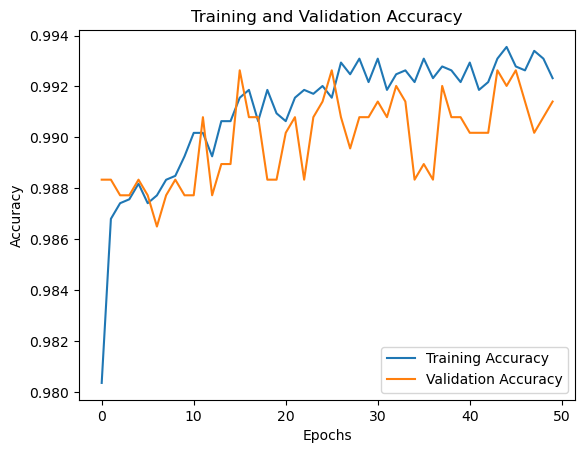

In [37]:
# Build Model using the Best Parameters found
tuned_model = build_model(optimizer=best_params['optimizer'], dropout_rate=best_params['dropout_rate'])

# Train Model
history = tuned_model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1)

# Plotting the training accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')

# Plotting the validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Adding a title to the plot
plt.title('Training and Validation Accuracy')

# Adding labels for the X and Y axes
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Adding a legend to the plot to identify the lines
plt.legend()

# Displaying the plot
plt.show()

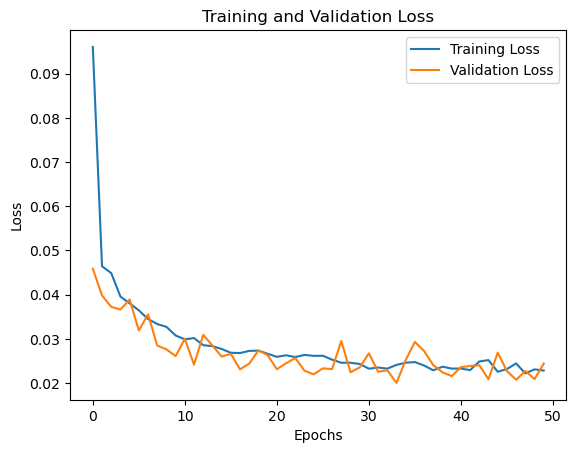

In [38]:
''' 
Plotting the training and validation loss.
This will help visualize if there is any Overfitting
'''
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [39]:
# Evaluating the model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test_scaled, y_test, verbose=0)

# Printing the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss * 100:.2f}%")

Test Accuracy: 99.14%
Test Loss: 2.44%


In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Getting the predicted probabilities for the validation data
y_pred_prob = best_model.predict(X_test_scaled)

# Converting probabilities to binary predictions (using a threshold of 0.5)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculating precision
precision = precision_score(y_test, y_pred)

# Calculating recall
recall = recall_score(y_test, y_pred)

# Calculating F1-score
f1 = f1_score(y_test, y_pred)

# Printing the results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")






51/51 [==============================] - 0s 601us/step
Precision: 0.9686
Recall: 0.9883
F1-Score: 0.9784


* Conclusion:

I developed two neural network models to perform binary classification on the given dataset, one with hyperparameter tuning and the other without.

1. Model Without Hyperparameter Tuning:
    - Test Accuracy: 99.32%
    - Test Loss: 2.11%
    - This model shows remarkable accuracy and low loss on the test data. It was trained using a predetermined set of hyperparameters, and its performance represents a strong baseline for comparison against the other model.

2. Model With Hyperparameter Tuning:
    -Test Accuracy: 99.14%
    -Test Loss: 2.44%
    - This model was trained using the parameters found from the hyperparameter tuning process, which it explores various combinations to find the optimal inputs for the model to perform better. 
    - Although the accuracy is slightly lower than the model without tuning, it's still high, and the process provided some insights into the behavior of different hyperparameters.

* Final Thoughts:
    - Both models achieved high accuracy, demonstrating strong capability in the given classification task. The differences in performance are minor but provide important insights:
        - The hyperparameter-tuned model, while slightly less accurate, represents a more systematic and data-driven approach to model construction. It may offer better generalization to unseen data or different datasets.
        - The model without tuning achieved the highest accuracy in this specific case, but the hyperparameters were not optimized through a search process, potentially limiting its adaptability to other scenarios or datasets.